# Voronoi Graphs

In [25]:
# Make the relevant imports including Voronoi methods
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
import math
%matplotlib inline 


In [26]:
plt.rcParams["figure.figsize"] = [12, 12]

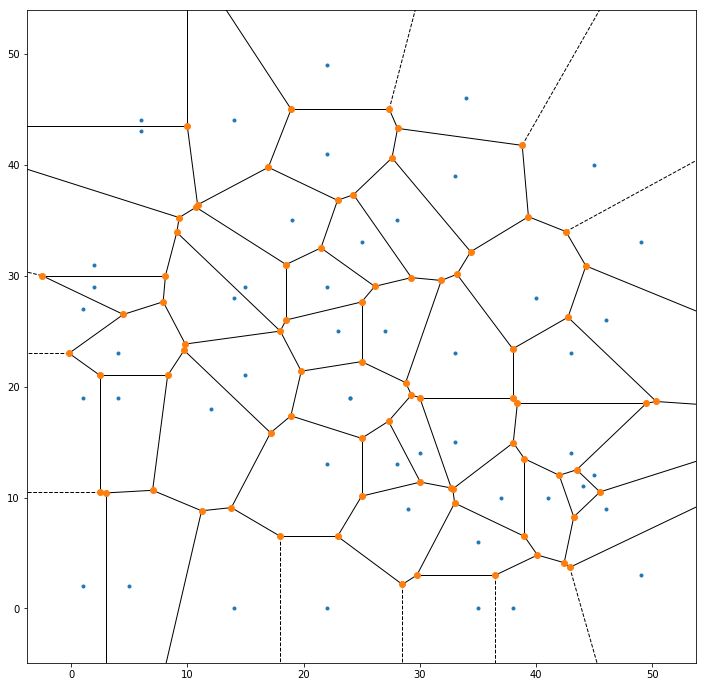

In [27]:

# Recreate the figure above for a new set of random points
points = np.random.randint(50, size=(50, 2))
graph = Voronoi(points)
voronoi_plot_2d(graph)
plt.show()

In [51]:
# Read in the obstacle data
filename = 'colliders.csv'
data = np.loadtxt(filename, delimiter=',', dtype='Float64', skiprows=2)
print(data)

[[-310.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-300.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-290.2389   -439.2315     85.5         5.          5.         85.5     ]
 ..., 
 [ 257.8061    425.1645      1.75852     1.292725    1.292725    1.944791]
 [ 293.9967    368.3391      3.557666    1.129456    1.129456    3.667319]
 [ 281.5162    354.4156      4.999351    1.053772    1.053772    4.950246]]


In [70]:
# If you want to use the prebuilt bresenham method
# Import the Bresenham package
#from bresenham import bresenham
def bres(p1, p2): 
    """
    Extended method for any p1 and p2
    """
    x1, y1 = p1
    x2, y2 = p2
    # First, set dx = x2 - x1 and dy = y2 - y1
    dx, dy = x2 - x1, y2 - y1
    #print('dx',dx)
    try:
        x_st = dx/abs(dx)
    except ZeroDivisionError:
        x_move = 0
        y_move = 1
        x_st = 1
    #Creepy Jupyter gets nan when dividing 0.0/0.0 in try block
    if math.isnan(x_st):
        x_move = 0
        y_move = 1
        x_st = 1
    try:
        y_st = dy/abs(dy)
    except ZeroDivisionError:
        y_move = 0
        x_move = 1
        y_st = 1
    if math.isnan(y_st):
        y_move = 0
        x_move = 1
        y_st = 1
        
    cells = []
    # TODO: Determine valid grid cells

    try:
        m = (y2 - y1)/(x2 - x1) #slope
        b = y2 - m * x2
        s = dx/abs(dx) #sign to multipy without replacing < with >
    except ZeroDivisionError:
        b = 0
        s = 1
    if math.isnan(s):
        b = 0
        s = 1
    # The condition we care about is whether 
    # (x + x_step) * m  + b < y + y_step
    # (x + x_step) dy / dx < y + y_step - b 
    # which implies (dx < 0 case included): 
    # s *(x dy - y dx) < s *(y_st*dx - x_st*dy -b*dx)
    # Then define a new quantity: d = x dy - y dx
    # new condition: s*d < s*(y_st*dx - x_st*dy - b*dx)
    # and set d = 0 initially    
    d = x1 * dy - y1 * dx
    # Initialize i, j indices
    i = x1
    j = y1    
    while abs(i-x1) <= abs(dx) and abs(j-y1) <= abs(dy):  
#        print('x,y',(i,j), abs(i-x1), abs(dx),abs(j-y1), abs(dy))
        cells.append([i,j])
#        print('cells',cells)
        if dx == 0 or dy == 0:
            cells.append([i - x_st*y_move, j - y_st*x_move])
        elif s*d < s*(y_st * dx - x_st * dy - b * dx):
            #(x+1)m<y+1      (x+1)m=y+1   (x+1)m>y+1, m > 0
            #|----------|    |-----|      |--|     
            #|          |dy  |     |dy    |  |dy
            #|----------|    |-----|      |--|
            #  dx              dx          dx 
            
            #(x+1)m+b < y+1 => __/ x += 1, dy>0
            #OR 
            #(x-1)m+b < y-1 => y -= 1, dy<0
#            print('<')
            x_move = (abs(dy) + dy)//(2 * abs(dy)) #1 in case dy>0
            y_move = (abs(dy) - dy)//(2 * abs(dy)) #1 in case dy<0
        elif s*d > s*(y_st * dx - x_st * dy - b * dx):
            #(x+1)m+b > y+1 => __/ y += 1, dy>0
            #OR 
            #(x-1)m+b > y-1 => x -= 1, dy<0
#            print('>')
            x_move = (abs(dy) - dy)//(2 * abs(dy))
            y_move = (abs(dy) + dy)//(2 * abs(dy))
            #print('ij',i,j,'xmv,ymv',x_move,y_move,'ix1,jy1',i-x1,j-y1) 
        elif s*d == s*(y_st * dx - x_st * dy - b * dx): 
            # uncomment these two lines for conservative approach
            cells.append([i + x_st, j])
            cells.append([i, j + y_st])
#            print('=',s*d,s*(- b))
            x_move = 1
            y_move = 1
        else:
            x_move = 0
            y_move = 0
        i += x_st * x_move 
        j += y_st * y_move 
        d += x_st*x_move*dy - y_st*y_move*dx
    return np.array(cells)

def line_in_cells_plt(p1, p2, cells):
    x1, y1 = p1
    x2, y2 = p2
    # First, set dx = x2 - x1 and dy = y2 - y1
    dx, dy = x2 - x1, y2 - y1
    try:
        x_st = dx//abs(dx)
    except ZeroDivisionError:
        x_st = 1
    try:
        y_st = dy//abs(dy)
    except ZeroDivisionError:
        y_st = 1
        
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]])

    for q in cells:
#        print(q)
        plt.plot([q[0], q[0]+x_st], [q[1], q[1]], 'k')
        plt.plot([q[0], q[0]+x_st], [q[1]+y_st, q[1]+y_st], 'k')
        plt.plot([q[0], q[0]], [q[1],q[1]+y_st], 'k')
        plt.plot([q[0]+x_st, q[0]+x_st], [q[1], q[1]+y_st], 'k')

    plt.grid()
    plt.axis('equal')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Integer based Bresenham algorithm")
    plt.show()

In [112]:
# Here you'll modify the `create_grid()` method from a previous exercise
# In this new function you'll record obstacle centres and
# create a Voronoi graph around those points
def create_grid_and_edges(data, drone_altitude, safety_distance):
    """
    Returns a grid representation of a 2D configuration space
    along with Voronoi graph edges given obstacle data and the
    drone's altitude.
    """

    # minimum and maximum north coordinates
    north_min = np.floor(np.min(data[:, 0] - data[:, 3]))
    north_max = np.ceil(np.max(data[:, 0] + data[:, 3]))

    # minimum and maximum east coordinates
    east_min = np.floor(np.min(data[:, 1] - data[:, 4]))
    east_max = np.ceil(np.max(data[:, 1] + data[:, 4]))

    # given the minimum and maximum coordinates we can
    # calculate the size of the grid.
    north_size = int(np.ceil((north_max - north_min)))
    east_size = int(np.ceil((east_max - east_min)))

    # Initialize an empty grid
    grid = np.zeros((north_size, east_size))
    # Center offset for grid
    north_min_center = np.min(data[:, 0])
    east_min_center = np.min(data[:, 1])
    
    # Define a list to hold Voronoi points
    points = []
    # Populate the grid with obstacles
    for i in range(data.shape[0]):
        north, east, alt, d_north, d_east, d_alt = data[i, :]

        if alt + d_alt + safety_distance > drone_altitude:
            obstacle = [
                int(north - d_north - safety_distance - north_min_center),
                int(north + d_north + safety_distance - north_min_center),
                int(east - d_east - safety_distance - east_min_center),
                int(east + d_east + safety_distance - east_min_center),
            ]
            grid[obstacle[0]:obstacle[1]+1, obstacle[2]:obstacle[3]+1] = 1
            
            # add center of obstacles to points list
            points.append([north - north_min, east - east_min])

    # TODO: create a voronoi graph based on
    # location of obstacle centres
    graph = Voronoi(points)
    voronoi_plot_2d(graph)
    plt.show()
    #print(points)
    # TODO: check each edge from graph.ridge_vertices for collision
    edges = []
    for v in graph.ridge_vertices:
        p1 = graph.vertices[v[0]]
        p2 = graph.vertices[v[1]]
        p1_gr = [int(round(x)) for x in p1]
        p2_gr = [int(round(x)) for x in p2]
        p = [p1_gr,p2_gr]
        #print(p1, p1_grid, p2, p2_grid)
    
        in_collision = True
        if np.amin(p) > 0 and np.amax(p[:][0]) < grid.shape[0] and np.amax(p[:][1]) < grid.shape[1]:
            track = bres(p1_gr,p2_gr)
            for q in track:
                #print(q)
                q = [int(x) for x in q]
                if grid[q[0],q[1]] == 1:
                    in_collision = True
                    break
                else:
                    in_collision = False
        if not in_collision:
            edges.append((p1,p2))

    return grid, edges

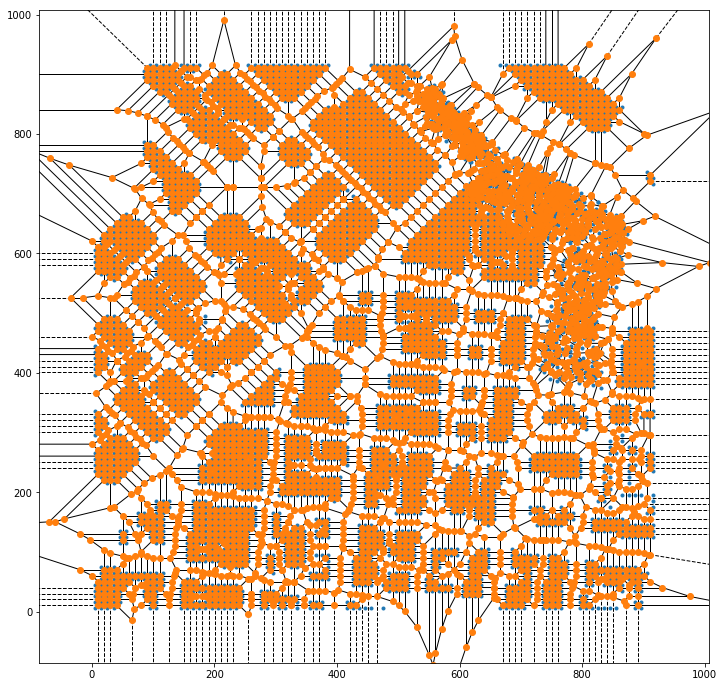

Found  1348 edges


In [113]:
# Define a flying altitude (feel free to change this)
drone_altitude = 5
safety_distance = 3
grid, edges = create_grid_and_edges(data, drone_altitude, safety_distance)
print('Found %5d edges' % len(edges))

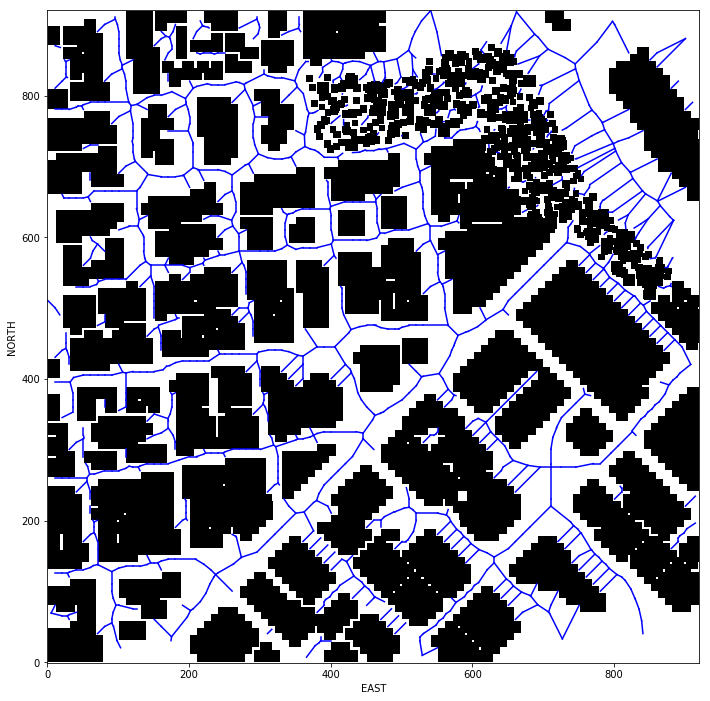

In [114]:
# equivalent to
# plt.imshow(np.flip(grid, 0))
# Plot it up!
plt.imshow(grid, origin='lower', cmap='Greys') 

# Stepping through each edge
for e in edges:
    p1 = e[0]
    p2 = e[1]
    plt.plot([p1[1], p2[1]], [p1[0], p2[0]], 'b-')

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

[solution](/notebooks/Voronoi-Solution.ipynb)